<a href="https://colab.research.google.com/github/Homaoa/Optimization/blob/main/Optimzation_an_assignment_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

An assignment model with three workers and three jobs.
The goal is to find the optimized assignment of jobs to workers while the costs are minimized.
Workers, jobs and costs are shown in the Figure below.

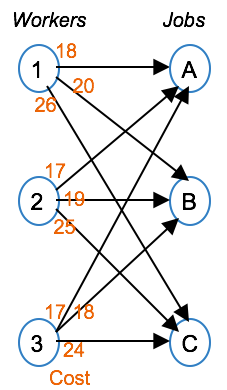

The mathematical model is as follows:

Objective Funcion:
    
    Min 18x1A + 20x1B + 26x1C + 17x2A + 19x2B + 25x2C + 17x3A + 18x3B + 24x3C 

St:

    x1A + x2A + x3A = 1
    x1B + x2B + x3B = 1
    x1C + x2C + x3C = 1

    x1A + x1B + x1C = 1
    x2A + x2B + x2C = 1
    x3A + x3B + x3C = 1

    x(i,j) = 1 if worker i is assigned to job j
    x(i,j) = 0 otherwise


In [1]:
import sys
try:
    import cplex
except:
    if hasattr(sys, 'real_prefix'):
        !pip install cplex
    else:
        !pip install --user cplex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43.3 MB 1.2 MB/s 


In [2]:
import sys
try:
    import docplex.mp
except:
    if hasattr(sys, 'real_prefix'):
        !pip install docplex
    else:
        !pip install --user docplex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 610 kB 8.4 MB/s 
  Created wheel for docplex: filename=docplex-2.23.222-py3-none-any.whl size=662847 sha256=2a91df82f251f1d052b68d692ed209df8b67fbe73405e19037665b4f015dea99
  Stored in directory: /root/.cache/pip/wheels/a7/c9/fb/cee5a89f304e77a39c466e625ac2830434b76eb8384999d116
Successfully built docplex


In [1]:
from docplex.mp.model import Model
tm = Model(name='Assignment') 

Parameters

In [2]:
costs = {(1,4):18 , (1,5):20 , (1,6):26 , (2,4):17 , (2,5):19 , (2,6):25 , (3,4):17 , (3,5):18 , (3,6):24 }

worker = range(1,4)
job = range(4,7)

Decision Variables

In [3]:
x = {(i,j): tm.continuous_var(name='x_{0}_{1}'.format(i,j)) for i in worker for j in job}

Constraints

In [4]:
# Each worker is assigned to exactly one job constraints
for i in worker:
    tm.add_constraint(tm.sum(x.get((i,j),0) for j in job) == 1)

# Each job is filled by exactly one person constraints
for j in job:
    tm.add_constraint(tm.sum(x.get((i,j),0) for i in worker) == 1)

Objective Function

In [5]:
tm.minimize(tm.sum(x.get((i,j),0)*costs.get((i,j), float('inf')) for i in worker for j in job))

tm.print_information()

Model: Assignment
 - number of variables: 9
   - binary=0, integer=0, continuous=9
 - number of constraints: 6
   - linear=6
 - parameters: defaults
 - objective: minimize
 - problem type is: LP


Final Results

In [6]:
tms = tm.solve()
assert tms
tms.display()

solution for: Assignment
objective: 61.000
x_1_5 = 1.000
x_2_4 = 1.000
x_3_6 = 1.000
